In [1]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv('../datasets/titanic/train.csv')
test_df = pd.read_csv('../datasets/titanic/test.csv')
combine = [train_df, test_df]

In [3]:
display(train_df)
display(train_df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


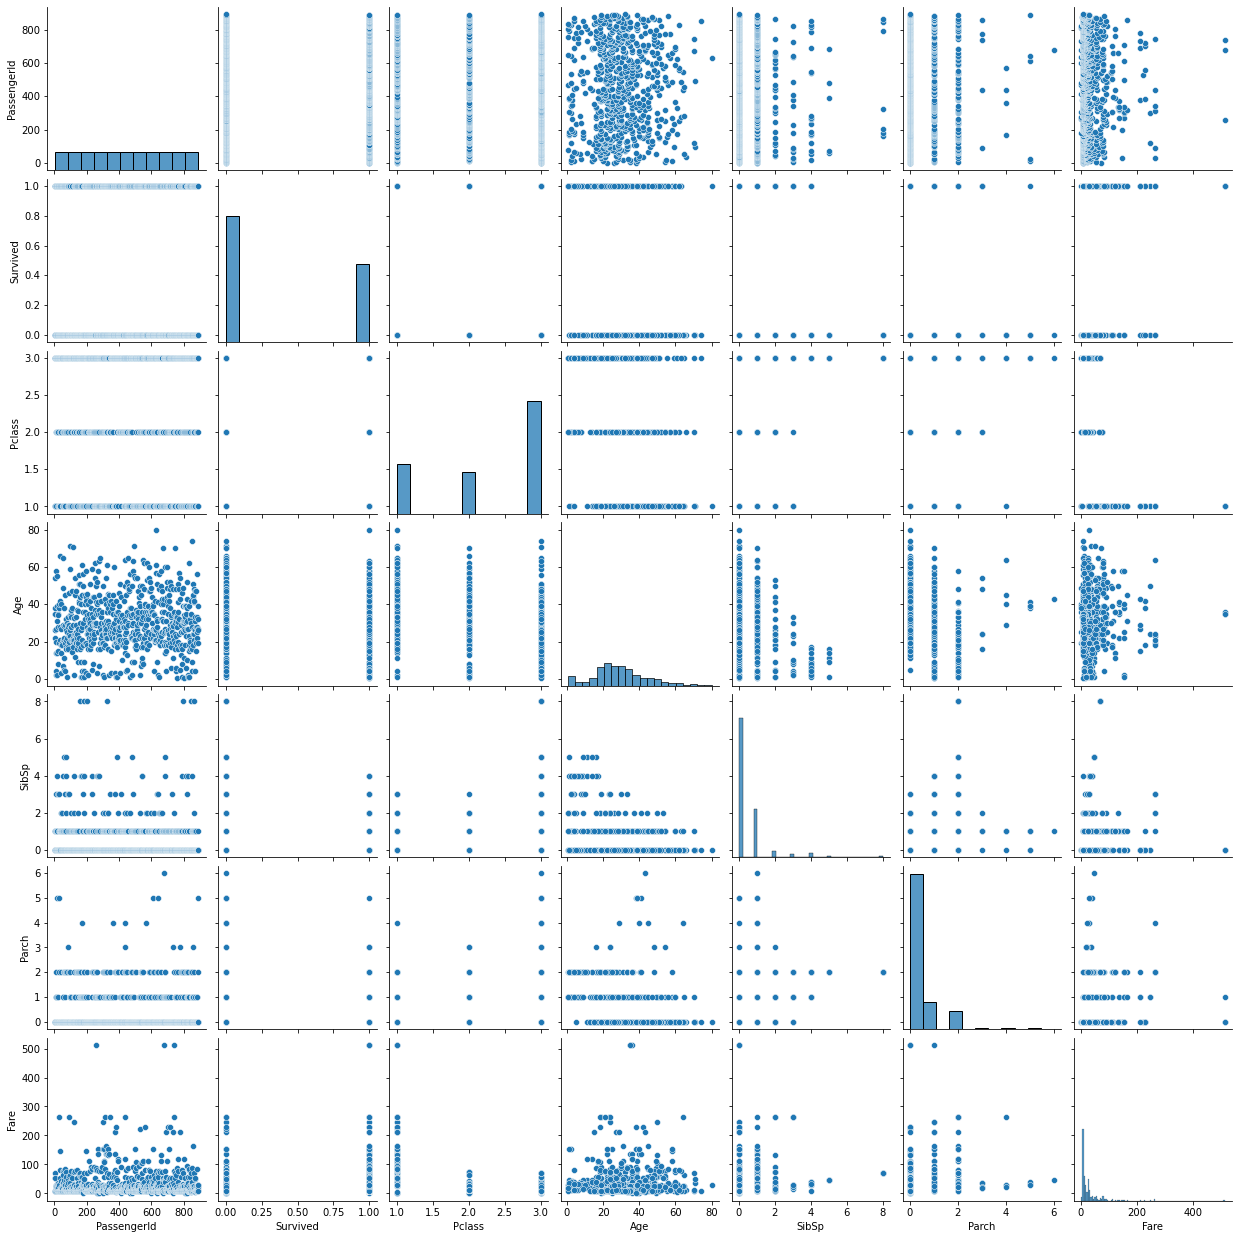

In [5]:
sns.pairplot(train_df)

<AxesSubplot:>

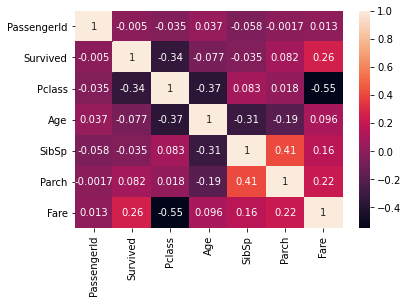

In [6]:
sns.heatmap(train_df.corr(),annot=True)

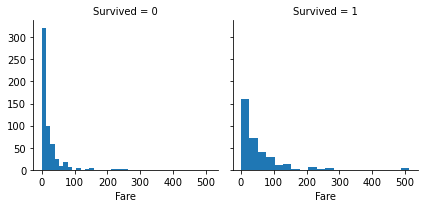

In [7]:
#deducing from the heatmap above, there is a correlation between surviving and fare: 0.26
#not many people paid for the higher-end tickets, which can explain why we have many surviving people in the lower-end
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)


,Survived
Sex,
female,0.742038
male,0.188908


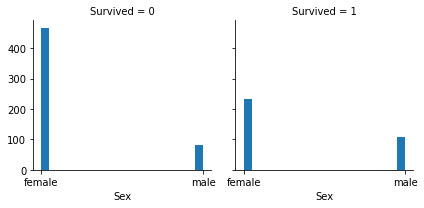

In [8]:
#female tends to have a better chance to survive
display(train_df[['Survived', 'Sex']].groupby('Sex').mean())
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


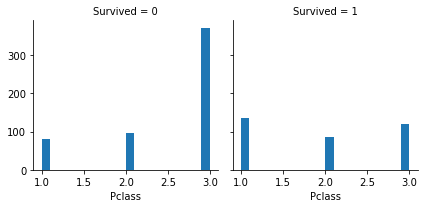

In [9]:
#also there's a negative correlation between surviving and passenger class
display(train_df[['Survived', 'Pclass']].groupby(['Pclass']).mean())
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

In [10]:
#droping ticket and cabin as they are no good 
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [11]:
#extracting title in people name, to see if it effects survival rate
#turned out a lot of miss survived
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [12]:
#renaming uncommon male titles to Rare
#Mlle, Ms to Miss
#Mme to Mrs
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Don'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme', ],'Mrs')

In [13]:
train_df[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [14]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Sex'] = dataset['Sex'].map({"male":0, "female":1}).astype(int)

train_df = train_df.drop(['PassengerId', 'Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1) #undo dropping PassengerId
combine=[train_df, test_df]



C:\Users\maidu\.conda\envs\tf\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\maidu\.conda\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\maidu\.conda\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


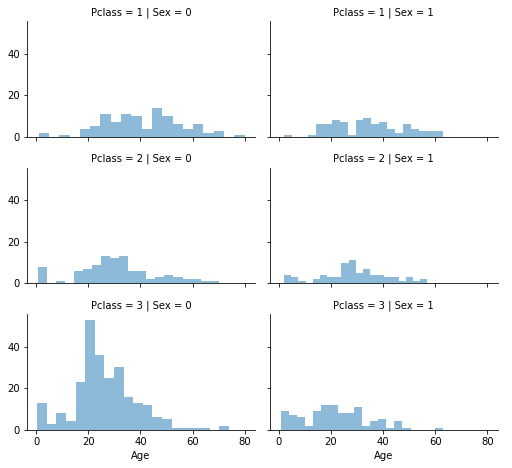

In [15]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [16]:
guess_ages = np.zeros((2,3))

#converting to nearest .5
#1.3 -> 1 | 5.5 -> 6
def nearest_point_five(num):
    if num % 1 < 0.5:
        num = int(num)
    else: 
        num = int(num) + 0.5
    return num

pd.options.mode.chained_assignment = None  # disable worning
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]["Age"].dropna()
            age_median = guess_df.median()
            age_median = nearest_point_five(age_median)
            guess_ages[i,j] = age_median

    for i in range(0,2):
        for j in range(0,3):
            dataset["Age"].loc[(dataset["Age"].isnull()) & (dataset["Sex"] == i) & (dataset["Pclass"] == j+1)] = guess_ages[i][j]

In [17]:
#deviding age to 5 bands for one hot encoding
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[["AgeBand","Survived"]].groupby("AgeBand").mean()


,Survived
AgeBand,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.336714
"(32.252, 48.168]",0.412844
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [18]:
#one hot encoding age
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [19]:
train_df['Age'].value_counts()

1.0    493
2.0    218
0.0    100
3.0     69
4.0     11
Name: Age, dtype: int64

In [20]:
#removing AgeBand now that we got the one hot encoding
train_df = train_df.drop(["AgeBand"], axis=1)
combine = [train_df, test_df]

In [21]:
#added IsAlone and FamilySize feature to remove SibSp and Parch
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize'] == 1, "IsAlone"] = 1


In [22]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [23]:
train_df[train_df["IsAlone"]==0]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
3,1,1,1,2.0,53.1000,S,3,0
7,0,3,0,0.0,21.0750,S,4,0
8,1,3,1,1.0,11.1333,S,3,0
...,...,...,...,...,...,...,...,...
874,1,2,1,1.0,24.0000,C,3,0
879,1,1,1,3.0,83.1583,C,3,0
880,1,2,1,1.0,26.0000,S,3,0
885,0,3,1,2.0,29.1250,Q,3,0


In [24]:
for dataset in combine:
    dataset['Age*Class'] = dataset["Age"]*dataset["Pclass"]
    

In [25]:
#most common occurance point of embarkment
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [26]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,7.2500,0,1,0,3.0
1,1,1,1,2.0,71.2833,1,3,0,2.0
2,1,3,1,1.0,7.9250,0,2,1,3.0
3,1,1,1,2.0,53.1000,0,3,0,2.0
4,0,3,0,2.0,8.0500,0,1,1,6.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,13.0000,0,5,1,2.0
887,1,1,1,1.0,30.0000,0,2,1,1.0
888,0,3,1,1.0,23.4500,0,2,0,3.0
889,1,1,0,1.0,30.0000,1,1,1,1.0


In [27]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


In [28]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [29]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,0,0,1,0,3.0
1,1,1,1,2.0,3,1,3,0,2.0
2,1,3,1,1.0,1,0,2,1,3.0
3,1,1,1,2.0,3,0,3,0,2.0
4,0,3,0,2.0,1,0,1,1,6.0
5,0,3,0,1.0,1,2,1,1,3.0
6,0,1,0,3.0,3,0,1,1,3.0
7,0,3,0,0.0,2,0,4,0,0.0
8,1,3,1,1.0,1,0,3,0,3.0
9,1,2,1,0.0,2,1,3,0,0.0


In [31]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2.0,0,2,1.0,1,6.0
1,893,3,1,2.0,0,0,3.0,0,6.0
2,894,2,0,3.0,1,2,1.0,1,6.0
3,895,3,0,1.0,1,0,1.0,1,3.0
4,896,3,1,1.0,1,0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,1,0,1.0,1,3.0
414,1306,1,1,2.0,3,1,0.0,1,2.0
415,1307,3,0,2.0,0,0,1.0,1,6.0
416,1308,3,0,1.0,1,0,1.0,1,3.0


In [32]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId"], axis=1).copy()

#### Logistic Regression

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
acc_log = logreg.score(X_train, Y_train)
print(acc_log)

0.813692480359147


In [34]:
coeff_df = pd.DataFrame(train_df.columns.delete(0)) #grabbing the columns of train_df, remove the 1st col
coeff_df.columns = ['Features']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df #Correlation of each feature to Survived

,Features,Correlation
0,Pclass,-1.202458
1,Sex,2.202241
2,Age,-0.470744
3,Fare,-0.072521
4,Embarked,0.276919
5,Title,0.405422
6,IsAlone,0.184158
7,Age*Class,-0.049081


#### Stochastic Gradient Descent

In [35]:
from sklearn.linear_model import SGDClassifier
sgdcls = SGDClassifier()
sgdcls.fit(X_train, Y_train)
y_pred_sgd = sgdcls.predict(X_test)
sgdcls.score(X_train, Y_train)
acc_sgd = sgdcls.score(X_train, Y_train)
acc_sgd

0.7699214365881033

#### Neural Net

#### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)
acc_log = dtc.score(X_train, Y_train)
print(acc_log)

0.8664421997755332


In [57]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Class'],
      dtype='object')

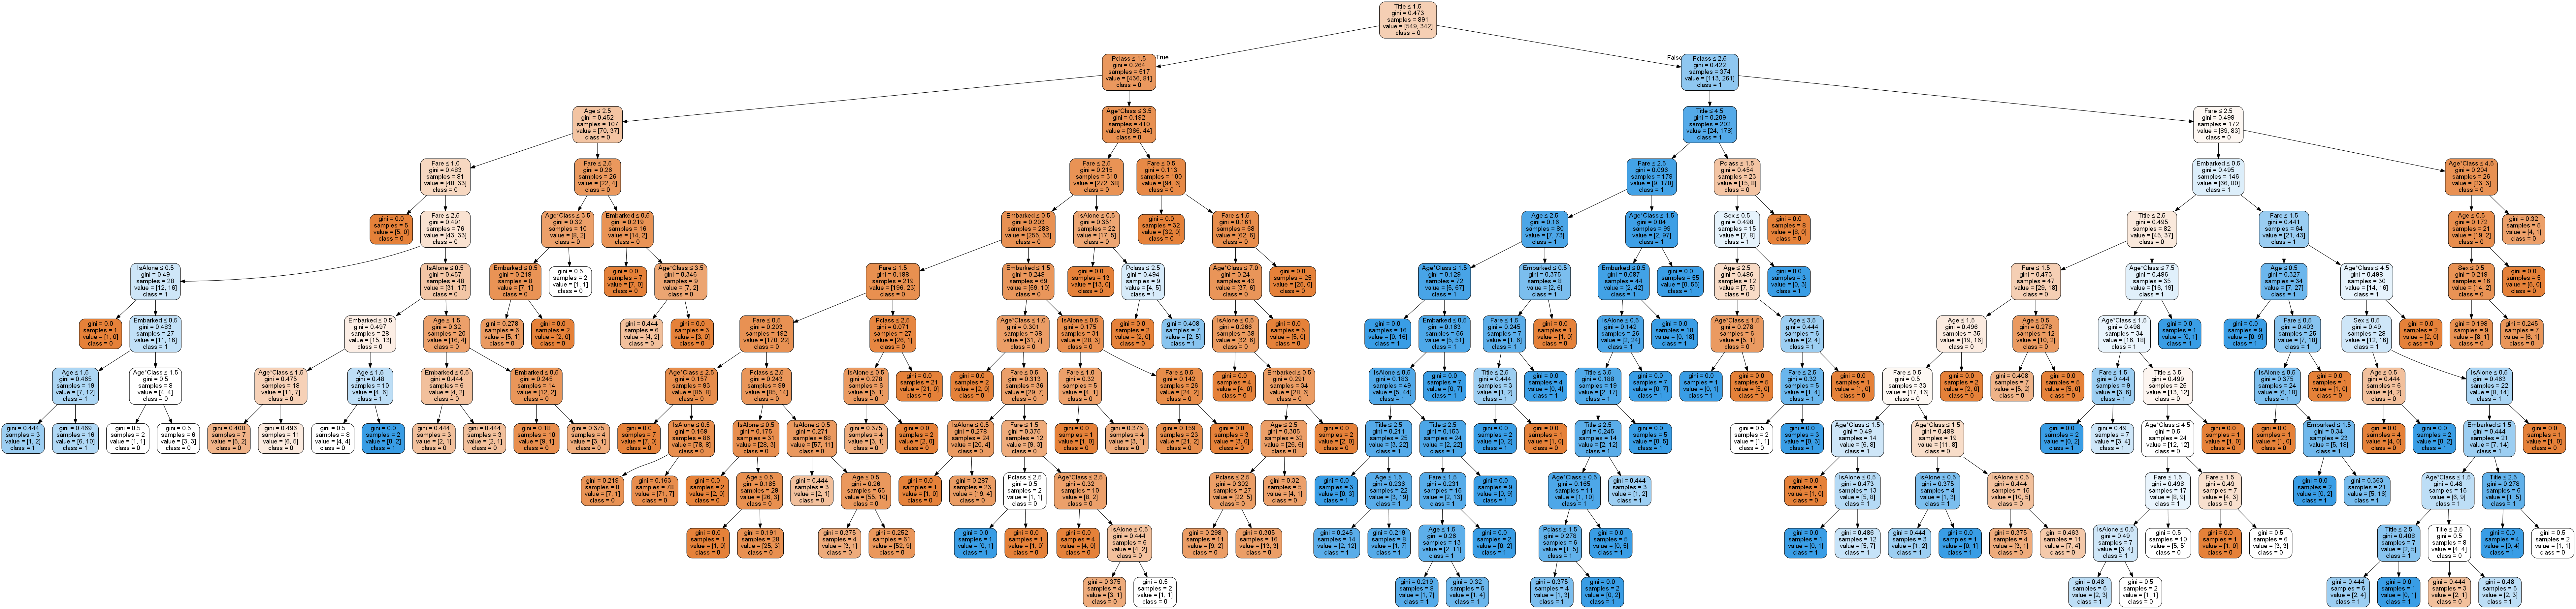

In [59]:
#Decision Tree visualization
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

In [46]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred_dtc
    })

In [47]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
#submission.to_csv('submission.csv', index=False)